# Pre-Processsing

In [53]:
#### Import dictionary
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [54]:
# instantiate the model
sid = SentimentIntensityAnalyzer()

In [55]:
comments_2019_clean = pd.read_csv('comments_2019_clean.csv', engine='python')

In [56]:
comments_2019_clean = pd.read_csv('comments_2019_clean.csv', engine='python')
comments_2020_clean = pd.read_csv('comments_2020_clean.csv', engine='python')
comments_2021_clean = pd.read_csv('comments_2021_clean.csv', engine='python')
comments_2022_clean = pd.read_csv('comments_2022_clean.csv', engine='python')
comments_2023_clean = pd.read_csv('comments_2023_clean.csv', engine='python')

In [52]:
# Creating a new DataFrame after dropping missing values in the 'text' column
comments_2019_clean = comments_2019_clean.dropna(subset=['text'])
comments_2020_clean = comments_2020_clean.dropna(subset=['text'])
comments_2021_clean = comments_2021_clean.dropna(subset=['text'])
comments_2022_clean = comments_2022_clean.dropna(subset=['text'])
comments_2023_clean = comments_2023_clean.dropna(subset=['text'])

In [57]:
comments_combined = pd.concat([comments_2019_clean, comments_2020_clean, comments_2021_clean,comments_2022_clean,comments_2023_clean])

In [7]:
import pandas as pd
from tabulate import tabulate
# Get column names as a list
column_names = list(comments_combined.columns)

# Display column names as a table
table = tabulate({"Column Names": column_names}, headers="keys", tablefmt="grid")

In [217]:
# Plotting the table as text in a Matplotlib plot
plt.figure(figsize=(6, 3))  # Set the figure size (width, height)
plt.text(0.1, 0.1, table, ha='left', va='top', fontsize=10, family='monospace')
plt.axis('off')  # Turn off the axis

# Save the plot as an image
plt.savefig('column_names_table.png', bbox_inches='tight', dpi=300)
plt.close()

In [8]:
# apply the dictionary to your data frame
comments_2019_clean["sentiment"]=comments_2019_clean["text"].apply(sid.polarity_scores)
comments_2020_clean["sentiment"] = comments_2020_clean["text"].apply(sid.polarity_scores)
comments_2021_clean["sentiment"] = comments_2021_clean["text"].apply(sid.polarity_scores)
comments_2022_clean["sentiment"] = comments_2022_clean["text"].apply(sid.polarity_scores)
comments_2023_clean["sentiment"] = comments_2023_clean["text"].apply(sid.polarity_scores)

In [9]:
videoid_2019 = pd.read_csv('/Users/cola/Desktop/5203-Data/video_2019.csv', engine='python')
videoid_2020 = pd.read_csv('/Users/cola/Desktop/5203-Data/video_2020.csv', engine='python')
videoid_2021 = pd.read_csv('/Users/cola/Desktop/5203-Data/video_2021.csv', engine='python')
videoid_2022 = pd.read_csv('/Users/cola/Desktop/5203-Data/video_2022.csv', engine='python')
videoid_2023 = pd.read_csv('/Users/cola/Desktop/5203-Data/video_2023.csv', engine='python')

In [10]:
videoid_2019.columns

Index(['video_id', 'channel_title', 'channel_id', 'video_publish_date',
       'video_title', 'video_description', 'video_category', 'video_thumbnail',
       'collection_date'],
      dtype='object')

In [16]:
comments_2019_clean.columns

Index(['video_id', 'commenter_channel_url', 'commenter_channel_id',
       'commenter_channel_display_name', 'comment_id', 'comment_like_count',
       'comment_publish_date', 'text', 'commenter_rating', 'comment_parent_id',
       'collection_date', 'reply_count', 'sentiment'],
      dtype='object')

In [11]:
combined_videos = pd.concat([videoid_2019, videoid_2020, videoid_2021, videoid_2022, videoid_2023])

In [24]:
# List of DataFrames to concatenate vertically
data_frames = [comments_2019_clean, comments_2020_clean, comments_2021_clean, comments_2022_clean, comments_2023_clean]

# Concatenating DataFrames vertically
combined_df = pd.concat(data_frames)

In [25]:
comments = combined_df

In [26]:
# Extracting 'compound' values from the 'sentiment' column
comments['compound_values'] = comments['sentiment'].apply(lambda x: x['compound'])

In [27]:
combined_data = pd.merge(comments, combined_videos[['video_id', 'video_publish_date','video_title']], on='video_id', how='left')
#combined_data.head()

In [28]:
# Convert the timestamp column to datetime
combined_data['vedio_publish'] = pd.to_datetime(combined_data['video_publish_date'], unit='s')

In [29]:
combined_data['comment_publish'] = pd.to_datetime(combined_data['comment_publish_date'], unit='s')

In [30]:
combined_data['quarter'] = combined_data['vedio_publish'].dt.to_period('Q-DEC')

In [31]:
combined_data['quarter_comment'] = combined_data['comment_publish'].dt.to_period('Q-DEC')

In [123]:
# Sorting the DataFrame by the 'quarter' column
combined_data = combined_data.sort_values('quarter')

In [32]:
combined_data = combined_data.sort_values('quarter_comment')

In [34]:
combined_data['quarter'].describe()

count      25017
unique        20
top       2023Q2
freq        4471
Name: quarter, dtype: object

In [35]:
def categorize_compound(value):
    if value < -0.2:
        return "negative"
    elif value > 0.2:
        return "positive"
    else:
        return "neutral"
    
combined_data['sentiment_label'] = combined_data['compound_values'].apply(categorize_compound)

In [135]:
observations_by_quarter = combined_data.groupby('quarter')['compound_values'].count().reset_index(name='observations_count')
combined_data = pd.merge(combined_data, observations_by_quarter, on='quarter', how='left')

# Visulization

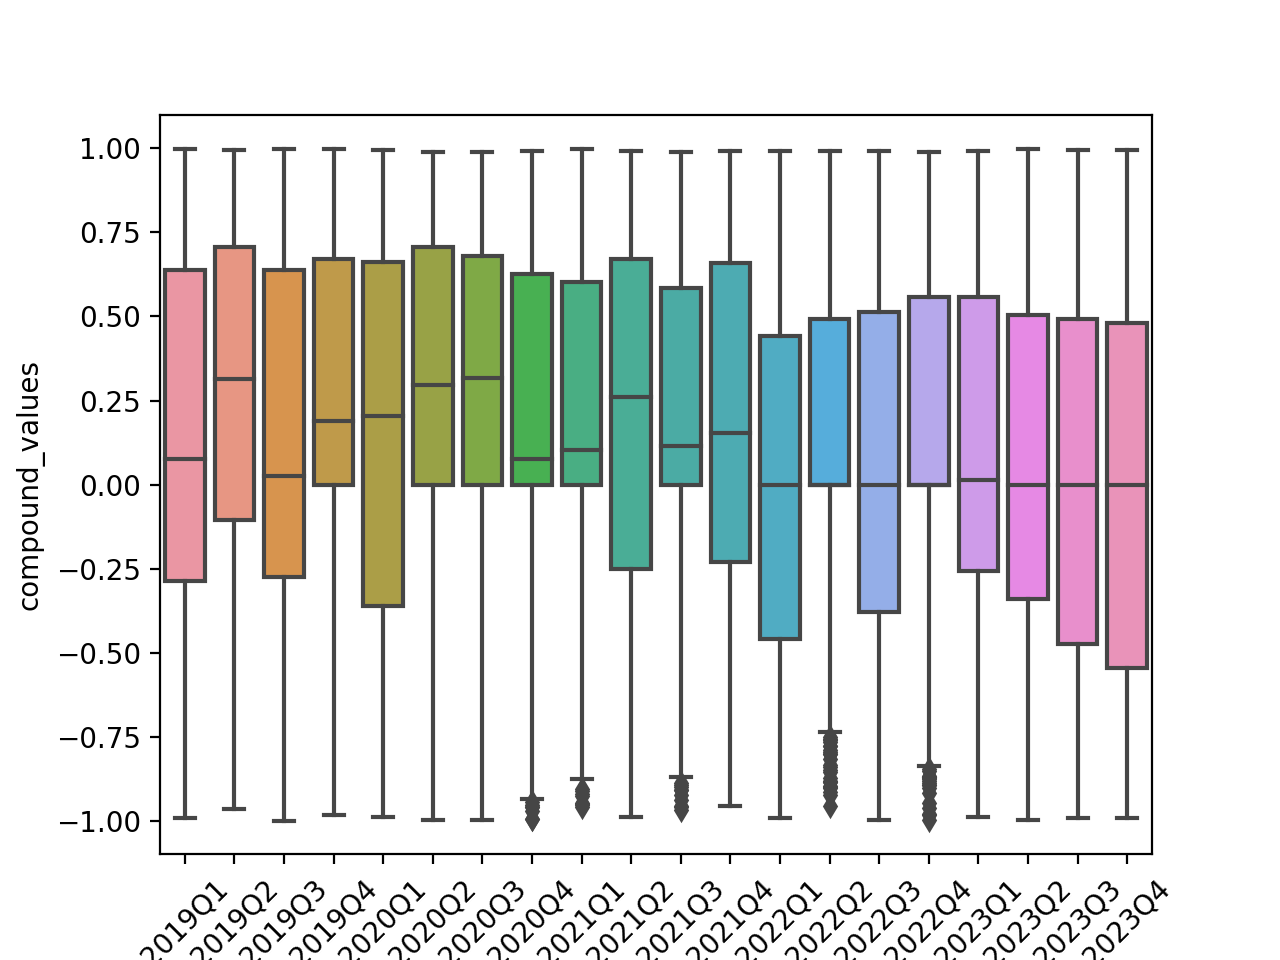

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = combined_data, x = 'quarter', y = 'compound_values' )
plt.xticks(rotation=45)
plt.show()

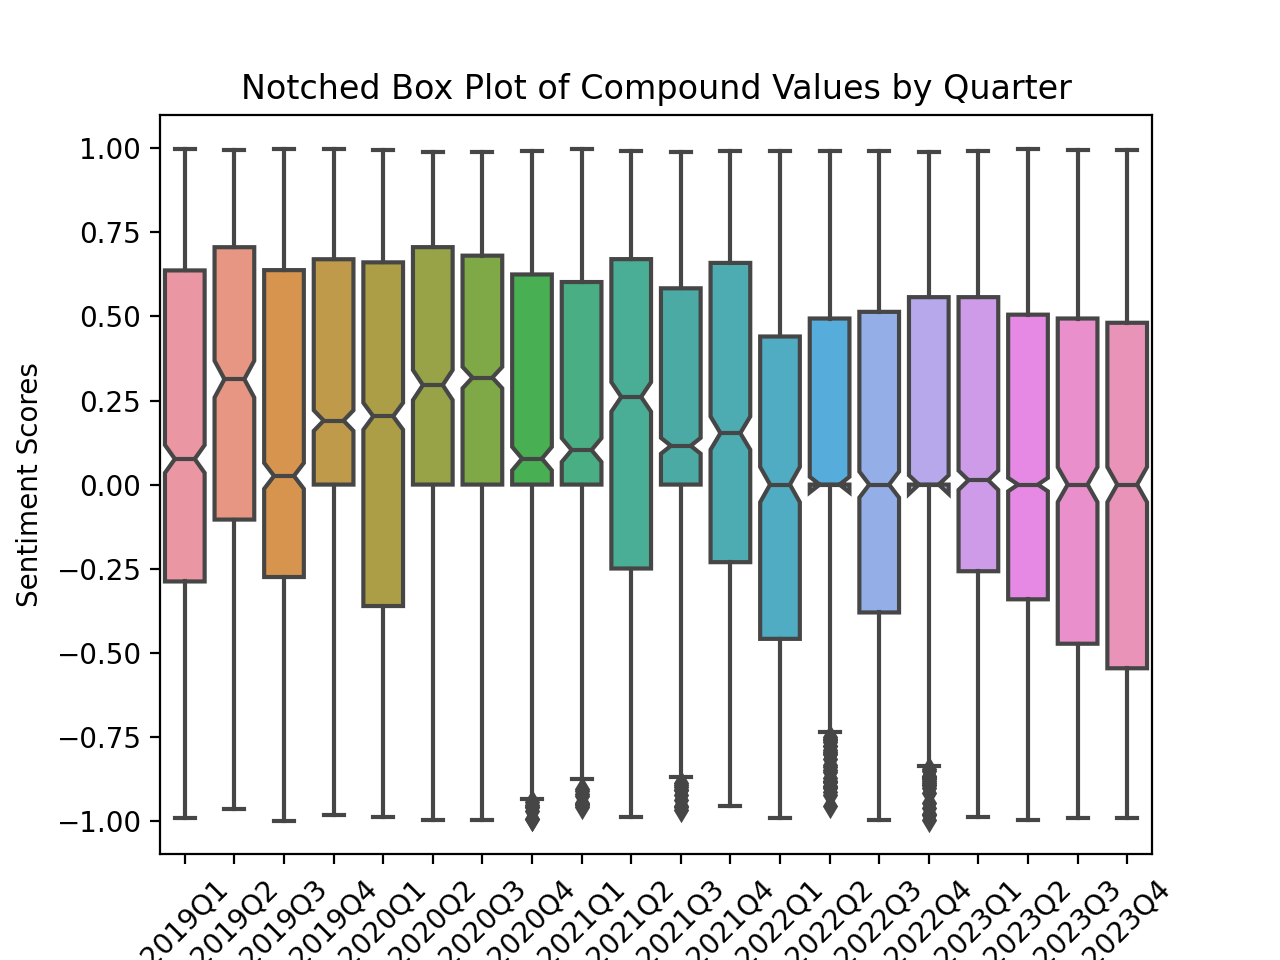

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your data)
# combined_data = ...

# Create the notched box plot
sns.boxplot(data=combined_data, x='quarter', y='compound_values', notch=True)
plt.xticks(rotation=45)

# Set x and y axis labels
plt.xlabel('Quarter')
plt.ylabel('Sentiment Scores')

# Add title to the plot
plt.title('Notched Box Plot of Compound Values by Quarter')

plt.show()

In [126]:
means = combined_data.groupby('quarter')['compound_values'].mean().reset_index()
means.to_csv('means_by_quarter.csv', index = False)
means_by_quarter = pd.read_csv('means_by_quarter.csv', engine = 'python')

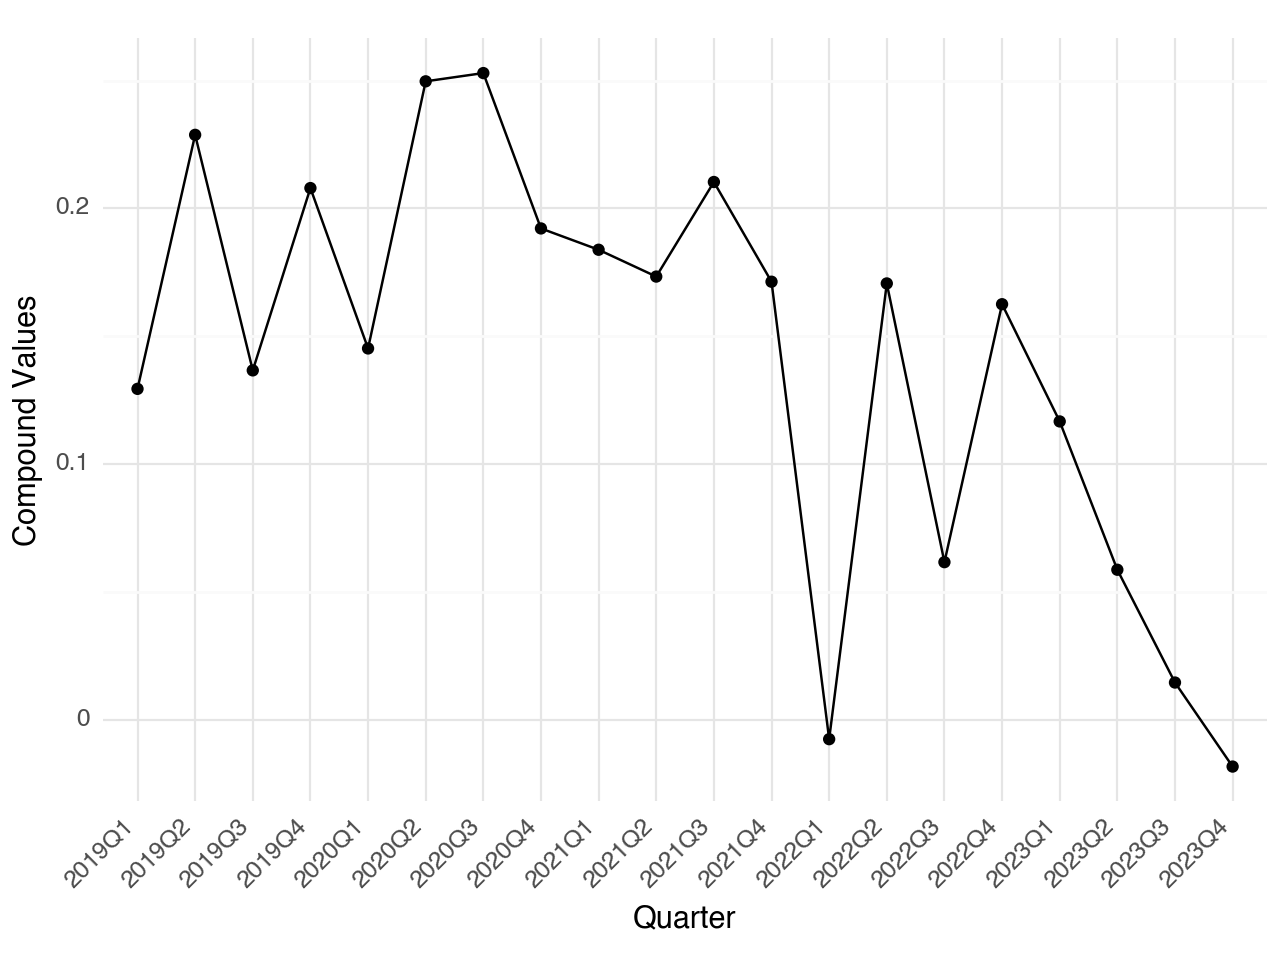

<Figure Size: (640 x 480)>

In [178]:
# Create the line plot
plot = (
    ggplot(means_by_quarter, aes(x='quarter', y='compound_values', group = 1)) +
    geom_point() +
    geom_line() +
    labs(x='Quarter', y='Compound Values') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

plot

In [37]:
means2 = combined_data.groupby('quarter_comment')['compound_values'].mean().reset_index()

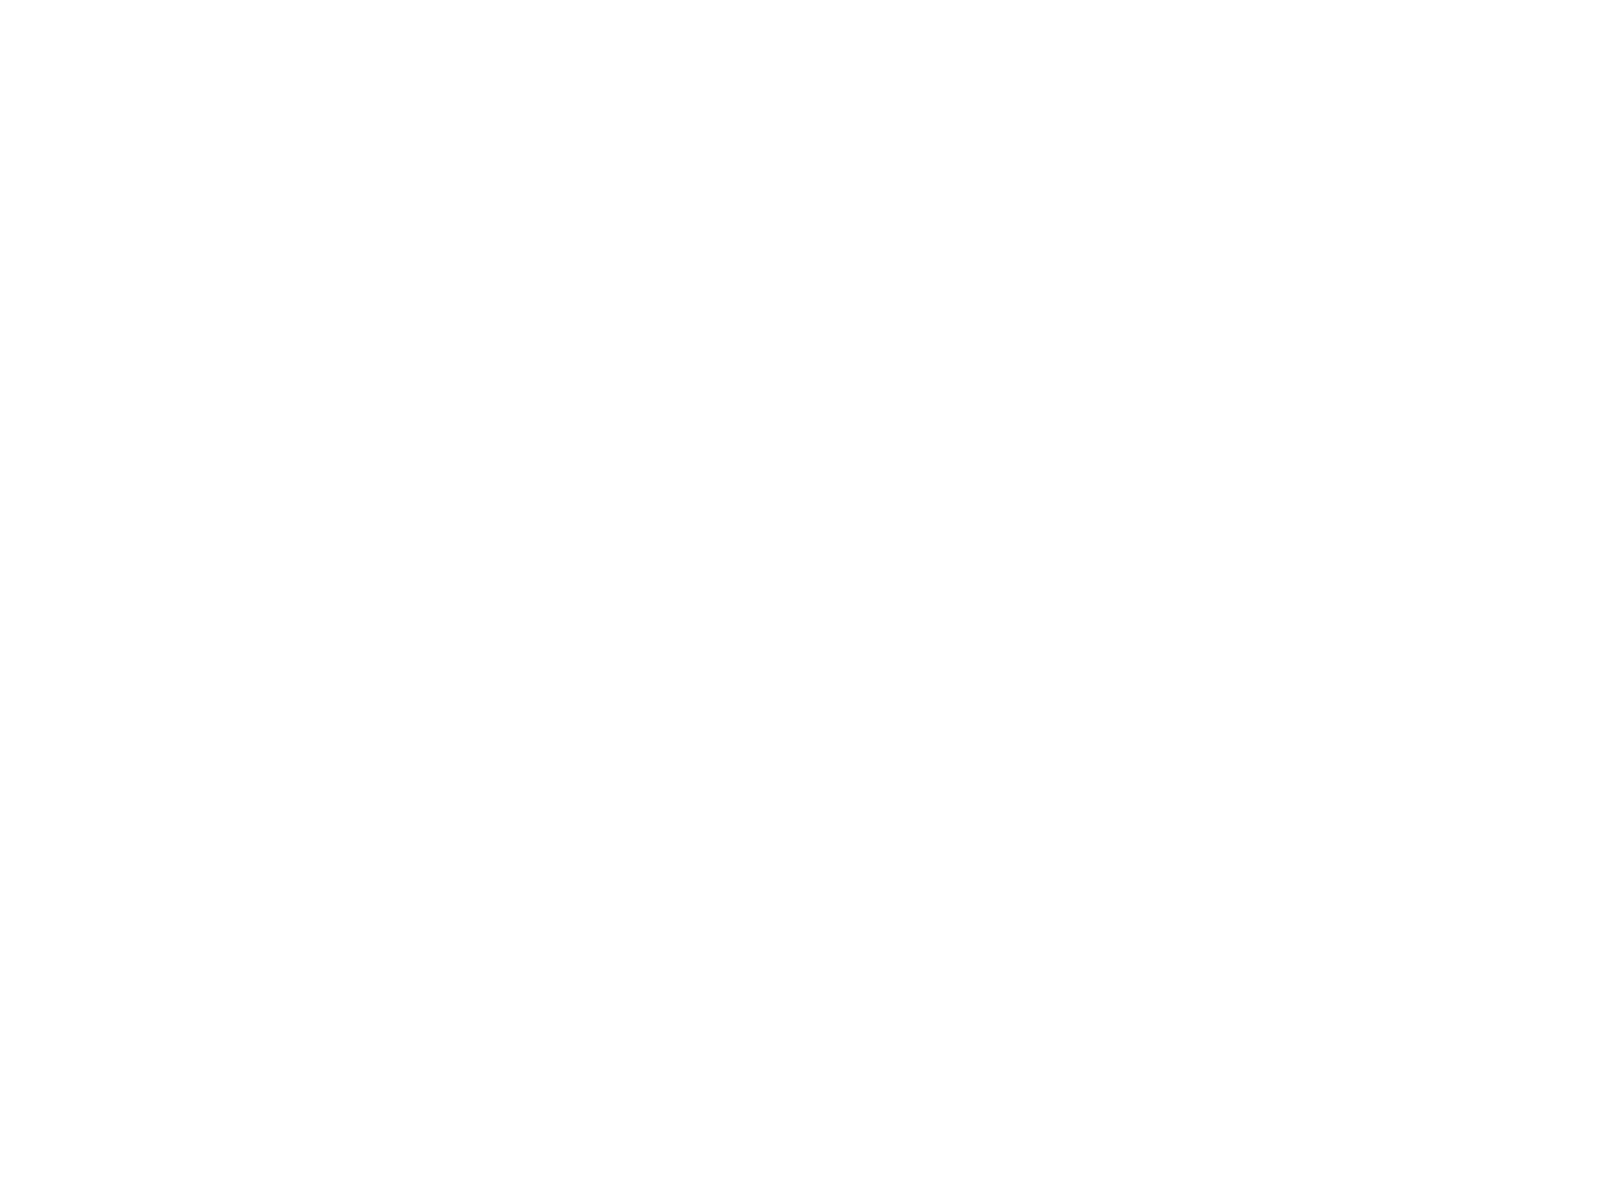

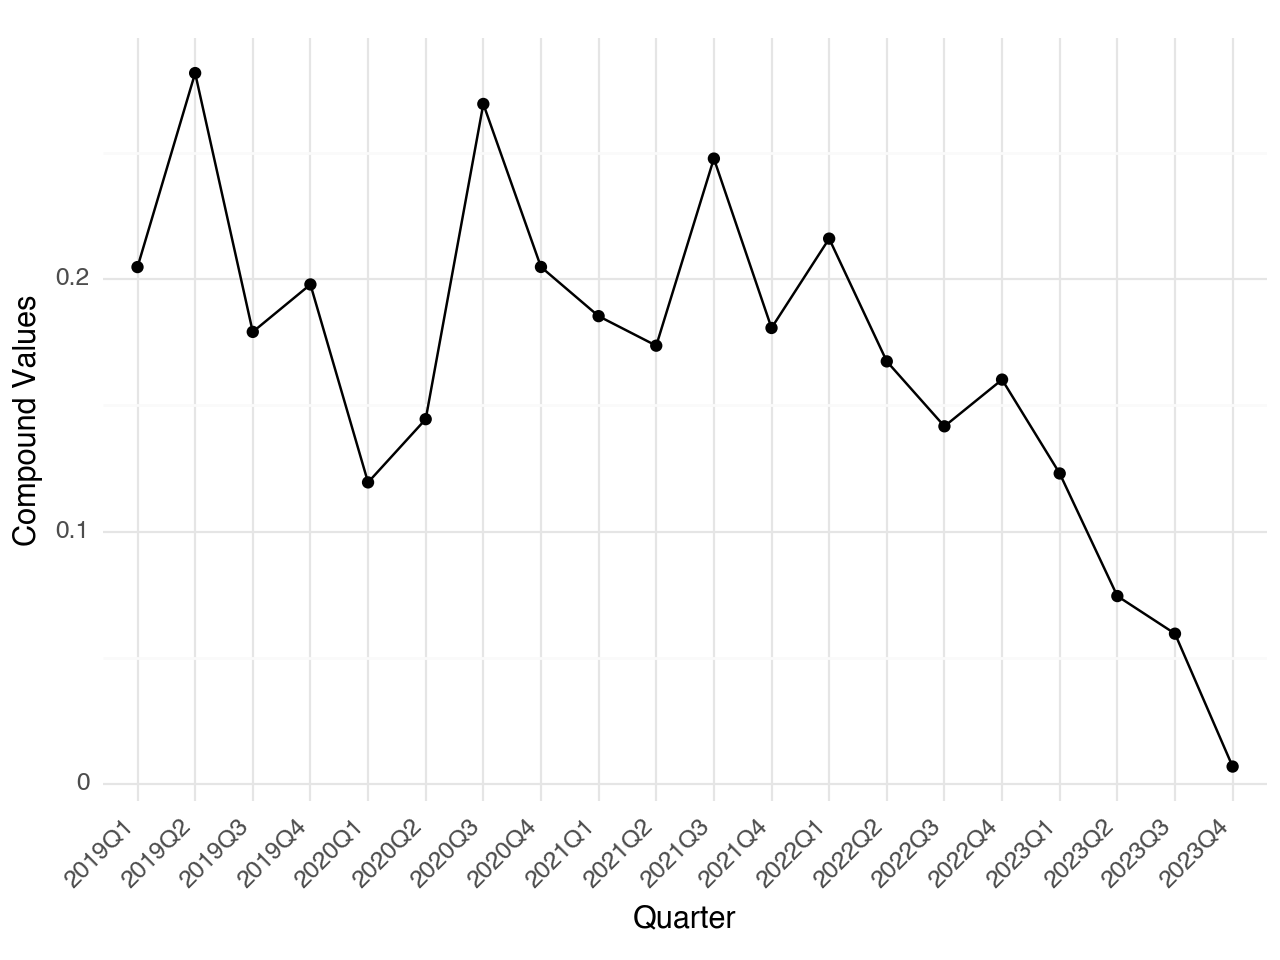

<Figure Size: (640 x 480)>

In [69]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme, element_text

# Assuming means2 is your DataFrame containing the data

plot = (
    ggplot(means2, aes(x='quarter_comment', y='compound_values', group=1)) +
    geom_point() +
    geom_line() +
    labs(x='Quarter', y='Compound Values') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)


plot

In [74]:
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt
plot.save('Compound_Values_per_Quarter.png', dpi=300)

/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Compound_Values_per_Quarter.png


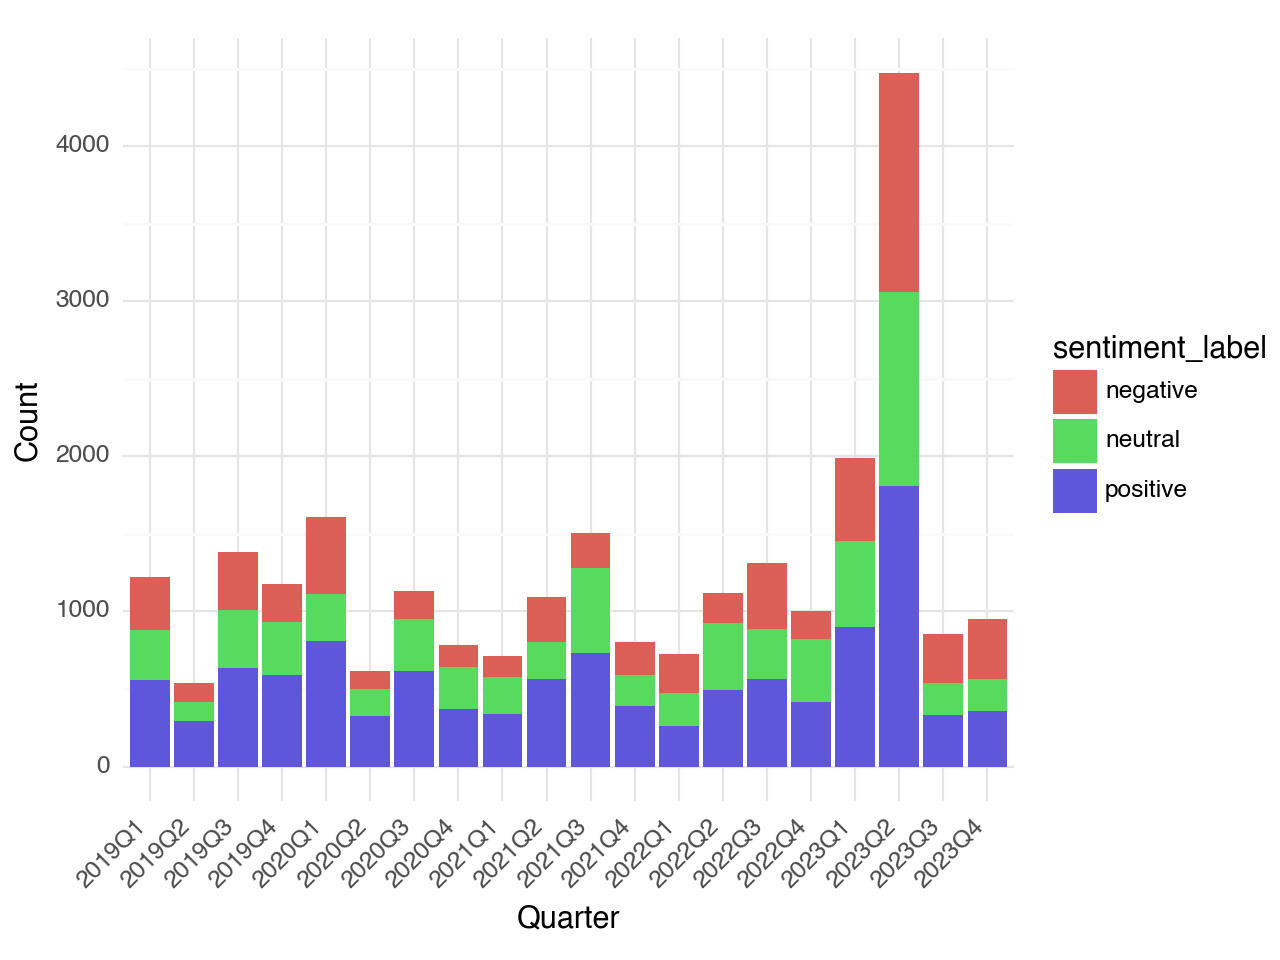

<Figure Size: (640 x 480)>

In [177]:
from plotnine import *
import pandas as pd

# Grouping data by quarter and sentiment label, counting observations
grouped_data = combined_data.groupby(['quarter', 'sentiment_label']).size().reset_index(name='count')

# Create the plot
(
    ggplot(grouped_data, aes(x='quarter', y='count', fill='sentiment_label')) +
    geom_bar(stat='identity', position='stack') +
    labs(x='Quarter', y='Count') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

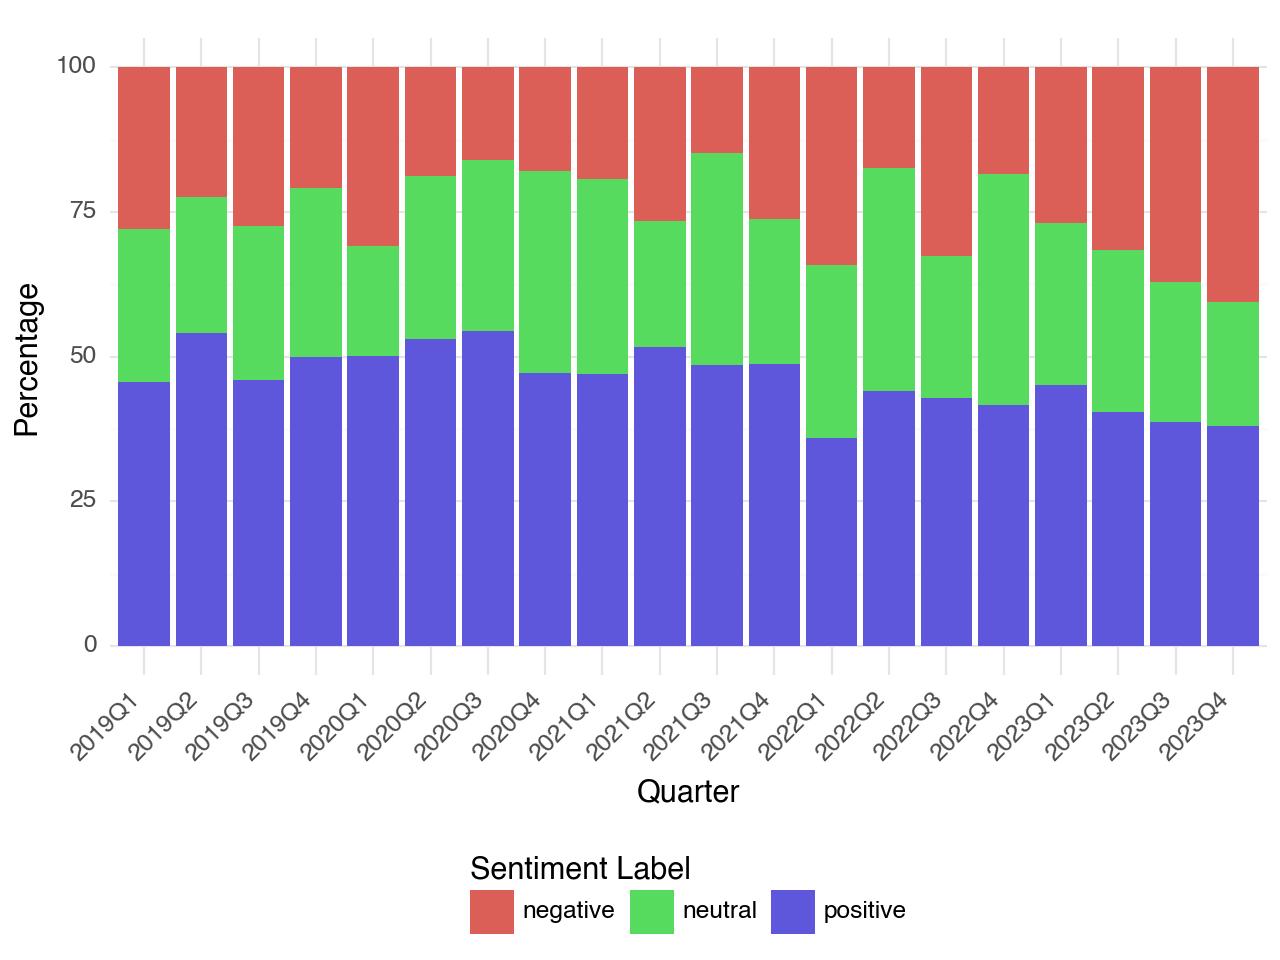

<Figure Size: (640 x 480)>

In [149]:
# Grouping data by quarter and sentiment label, counting observations
grouped_data = combined_data.groupby(['quarter', 'sentiment_label']).size().reset_index(name='count')

# Calculate percentages within each quarter for sentiment labels
grouped_data['percent'] = grouped_data.groupby('quarter')['count'].transform(lambda x: (x / x.sum()) * 100)

# Create the plot with y-axis in percentages
plot_sentiment_2 = (
    ggplot(grouped_data, aes(x='quarter', y='percent', fill='sentiment_label')) +
    geom_bar(stat='identity', position='stack') +
    labs(x='Quarter', y='Percentage', fill = 'Sentiment Label') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1), legend_position='bottom')  # Adjust the angle and position of x-axis labels
)

plot_sentiment_2

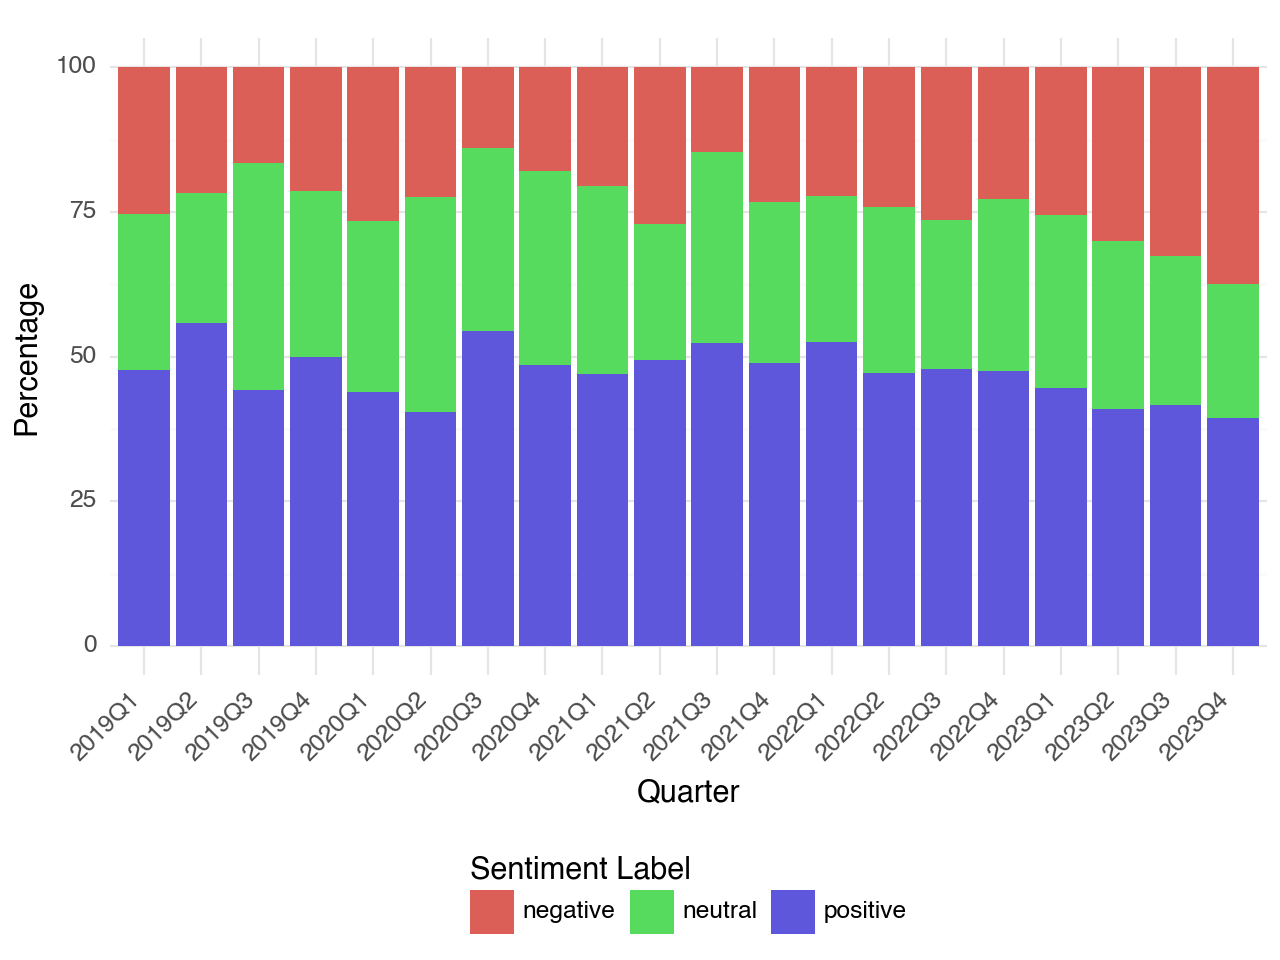

<Figure Size: (640 x 480)>

In [48]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text
# Grouping data by quarter and sentiment label, counting observations
grouped_data = combined_data.groupby(['quarter_comment', 'sentiment_label']).size().reset_index(name='count')

# Calculate percentages within each quarter for sentiment labels
grouped_data['percent'] = grouped_data.groupby('quarter_comment')['count'].transform(lambda x: (x / x.sum()) * 100)

# Create the plot with y-axis in percentages
plot_sentiment_2 = (
    ggplot(grouped_data, aes(x='quarter_comment', y='percent', fill='sentiment_label')) +
    geom_bar(stat='identity', position='stack') +
    labs(x='Quarter', y='Percentage', fill = 'Sentiment Label') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1), legend_position='bottom')  # Adjust the angle and position of x-axis labels
)

plot_sentiment_2

In [199]:
ggsave(plot_sentiment_2, filename='sentiment_analysis_plot2.png', dpi=300)

/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: sentiment_analysis_plot2.png


# description

In [190]:
comments_per_quarter

,quarter,comment_id
0,2019Q1,1225
1,2019Q2,540
2,2019Q3,1386
3,2019Q4,1178
4,2020Q1,1610
5,2020Q2,615
6,2020Q3,1129
7,2020Q4,785
8,2021Q1,716
9,2021Q2,1090


In [207]:
# 设置阈值
threshold = 2000

# 对超过阈值的异常值进行缩小处理
comments_per_quarter['comment_id_scaled'] = comments_per_quarter['comment_id'].apply(lambda x: x if x <= threshold else x * 0.5)

# 绘制图表，并对异常高的柱形进行缩小处理
plot = (
    ggplot(comments_per_quarter, aes(x='quarter', y='comment_id_scaled', label='comment_id'))
    + geom_bar(stat='identity', fill='skyblue')
    + geom_text(aes(label='comment_id'), va='bottom', nudge_y=5, size=8)
    + labs(title='Number of Comments in Each Quarter', x='Quarter', y='Scaled Number of Comments')
    + theme(axis_text_x=element_text(angle=45, hjust=1))
    + theme(figure_size=(10, 6))# Rotates the x-axis labels
)

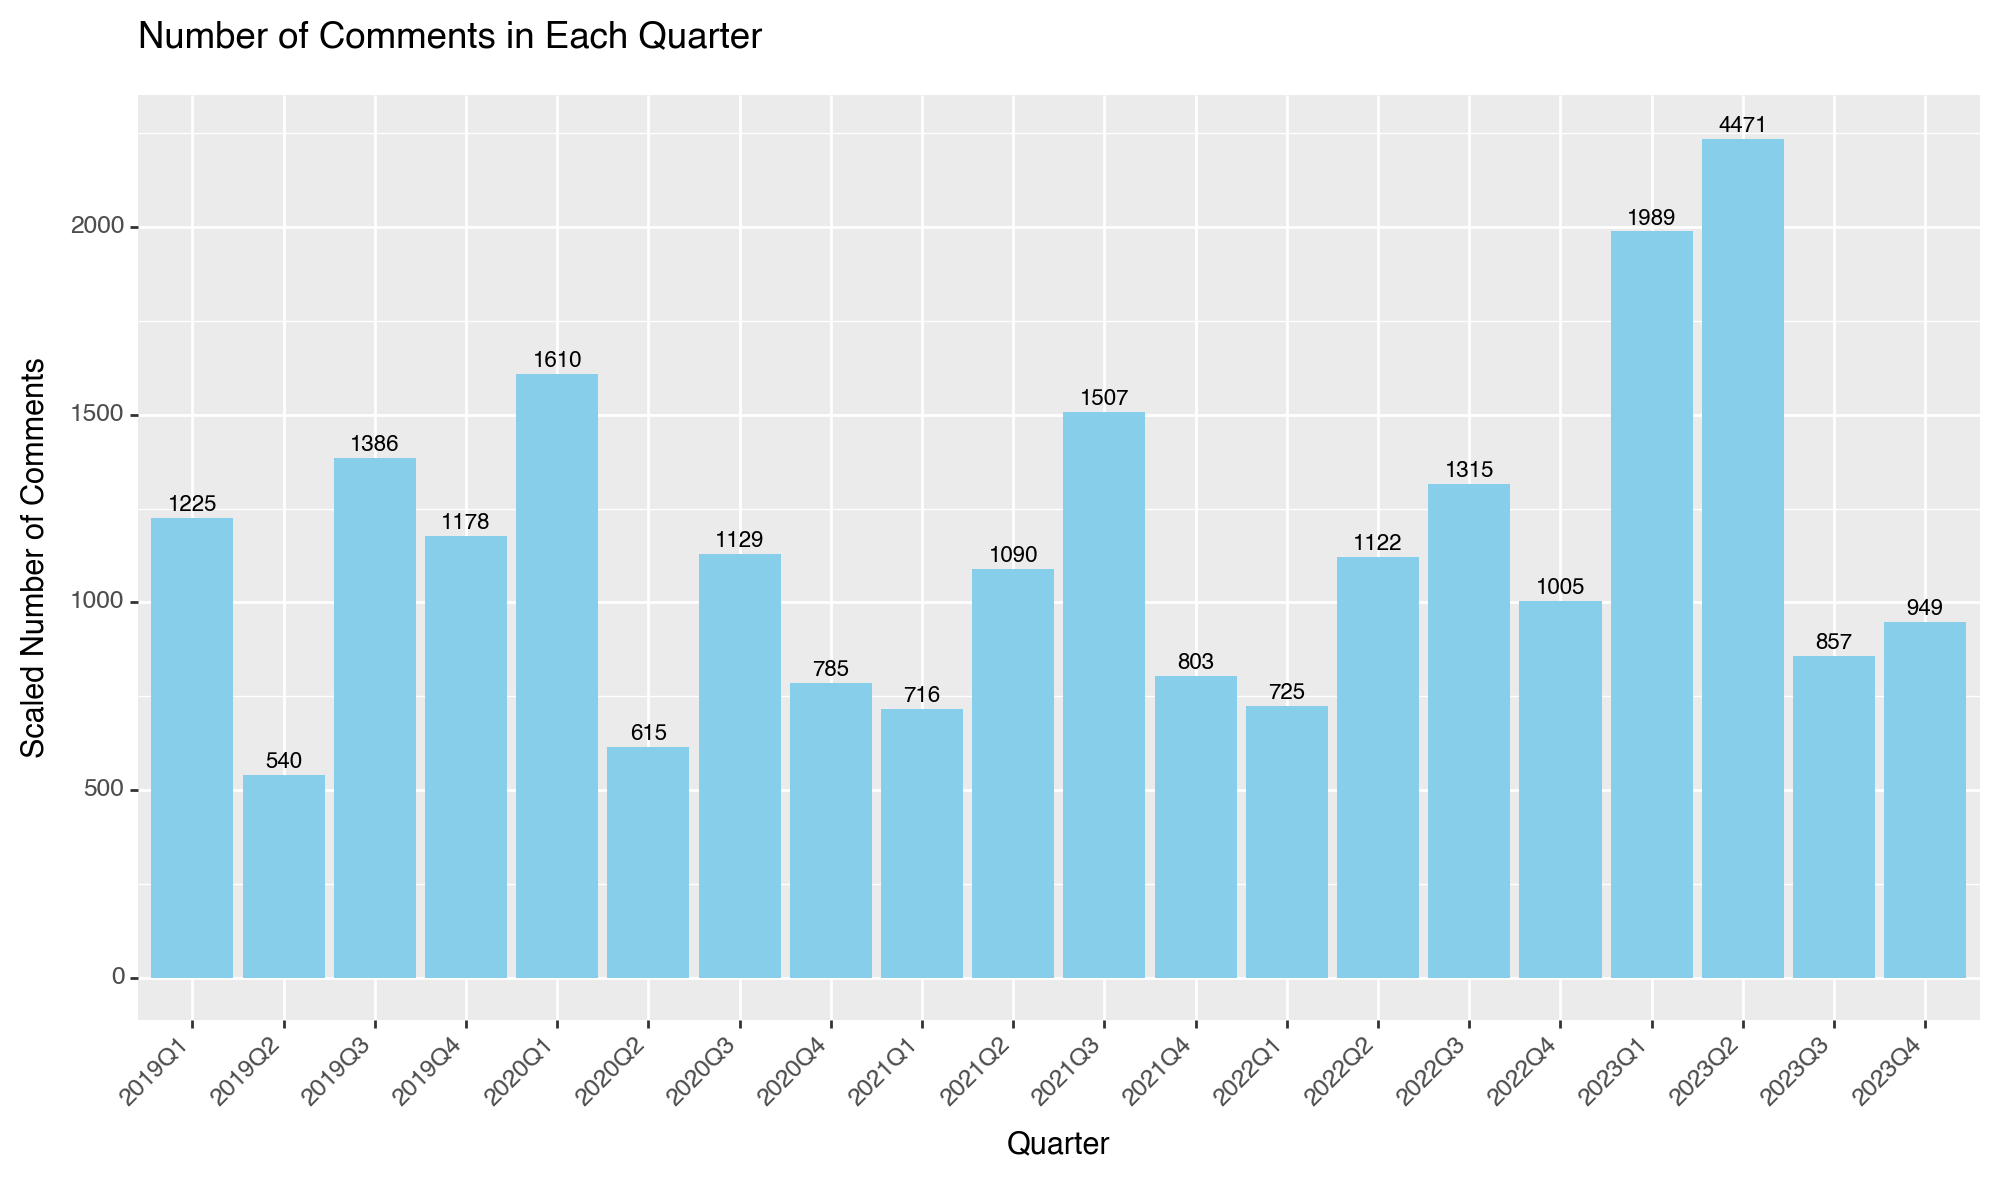

<Figure Size: (1000 x 600)>

In [208]:
plot

In [210]:
ggsave(plot, filename='describe.png', dpi=600)

/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
/Users/cola/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: describe.png


In [187]:
from plotnine import *

videos_per_quarter = combined_data.groupby('quarter')['video_id'].nunique().reset_index()

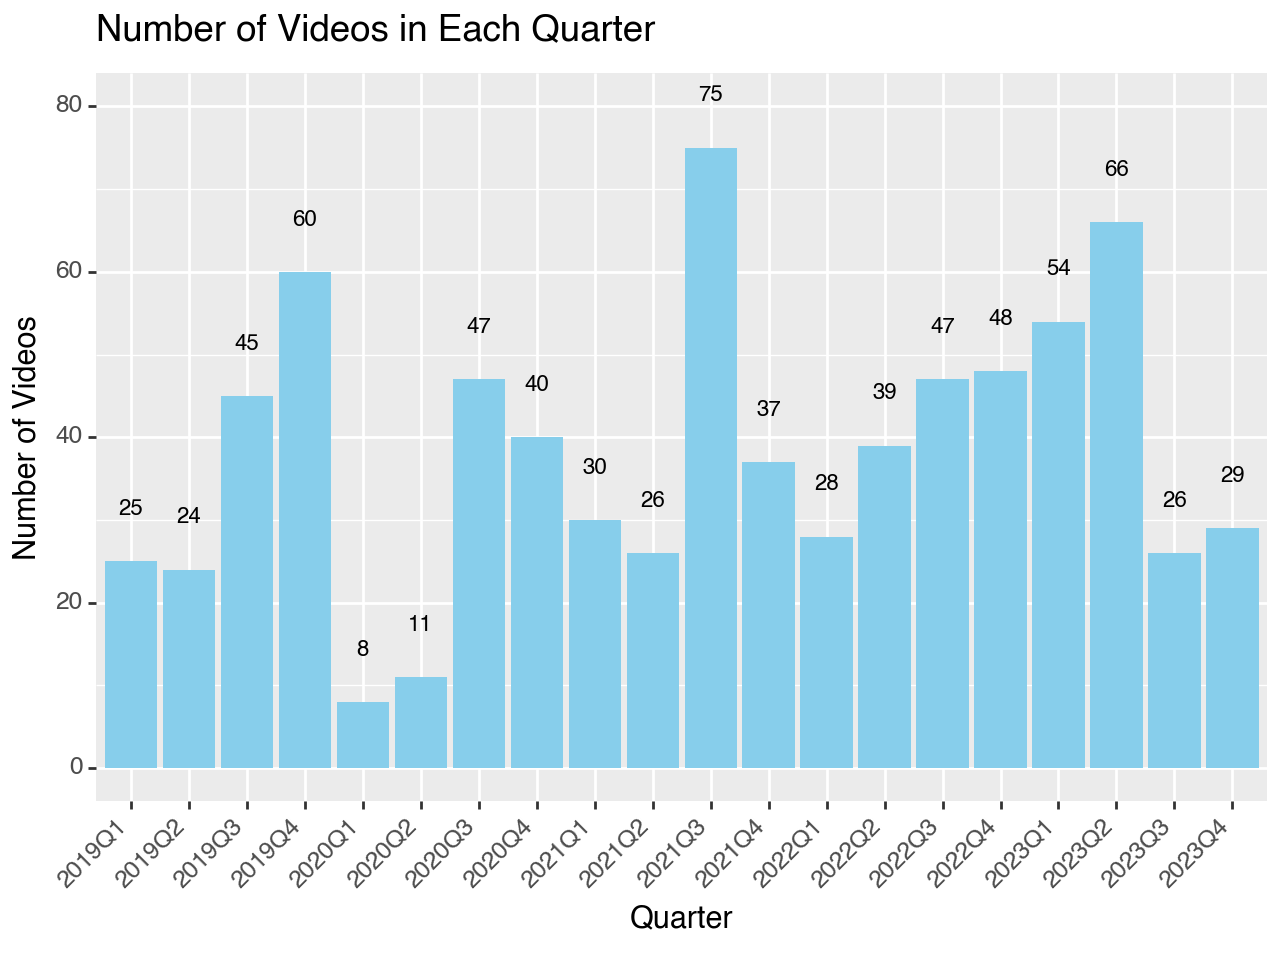

<Figure Size: (640 x 480)>

In [189]:
# Plotting the data using ggplot with x and y axes switched, adding labels and a line
(
    ggplot(videos_per_quarter, aes(x='quarter', y='video_id', label='video_id'))
    + geom_bar(stat='identity', fill='skyblue')
    + geom_text(aes(label='video_id'), va='bottom', nudge_y=5, size=8)
    + labs(title='Number of Videos in Each Quarter', x='Quarter', y='Number of Videos')
    + theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotates the x-axis labels
)

In [191]:
merged_table = pd.merge(videos_per_quarter, comments_per_quarter, how='left', on='quarter')

In [192]:
merged_table

,quarter,video_id,comment_id
0,2019Q1,25,1225
1,2019Q2,24,540
2,2019Q3,45,1386
3,2019Q4,60,1178
4,2020Q1,8,1610
5,2020Q2,11,615
6,2020Q3,47,1129
7,2020Q4,40,785
8,2021Q1,30,716
9,2021Q2,26,1090


In [49]:
import matplotlib.pyplot as plt

# Assuming merged_table is your DataFrame after merging videos_per_quarter and comments_per_quarter

# Creating a plot of the table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Hide the axes

# Creating a table plot
table = ax.table(cellText=merged_table.values,
                 colLabels=merged_table.columns,
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Saving the plot as a PNG image
plt.savefig('merged_table.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


NameError: name 'merged_table' is not defined

In [196]:
# Transpose the merged_table DataFrame
transposed_table = merged_table.transpose()

# Save the transposed DataFrame as a CSV file
transposed_table.to_csv('transposed_table.csv', header=False)

# Description

,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count
0,lwrXEjjBUio,http://www.youtube.com/channel/UC5abI7db0tXxT1...,UC5abI7db0tXxT1Q6BU_frWw,@FutureSystem738,UgzCssWBLpoJTq85atJ4AaABAg,1.0,1.554098e+09,Great thanks!\nI concur- we are an internation...,none,NaN,2023-12-02 21:28:06.926307,0.0
1,lwrXEjjBUio,http://www.youtube.com/channel/UC2TWeqcaGYMobK...,UC2TWeqcaGYMobKoHiMtQNHQ,@LudicrousFeed,UgzG_k7ePAmYog4o3RF4AaABAg,2.0,1.554030e+09,Great commentary. So true what you said about ...,none,NaN,2023-12-02 21:28:06.926329,1.0
2,5pxfyuDfQqI,http://www.youtube.com/channel/UCLUOTO4PO5EHWc...,UCLUOTO4PO5EHWcwM6YCGK8g,@27bykarthi,UgwdEv3ushkWWvvDG0F4AaABAg,12.0,1.570569e+09,*First provide electricity to all villages in ...,none,NaN,2023-12-02 21:28:07.381504,6.0
3,5pxfyuDfQqI,http://www.youtube.com/channel/UCbWOqEUiH5AlGm...,UCbWOqEUiH5AlGmZwzGQUHWw,@SenthilKumar21,Ugx5xx5YX77qpNCNAVp4AaABAg,0.0,1.570043e+09,Still india lagging very much in electric segm...,none,NaN,2023-12-02 21:28:07.381538,0.0
4,5pxfyuDfQqI,http://www.youtube.com/channel/UCRaIdQzQUEQjtj...,UCRaIdQzQUEQjtjbM_w3HwHw,@vforvikki7421,UgyP5g_9nTiquqOpTu94AaABAg,12.0,1.569447e+09,I'm from Karnataka Bangalore and I'm Kannadiga...,none,NaN,2023-12-02 21:28:07.381591,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,s-F81EaTs8Q,http://www.youtube.com/channel/UCAnp0ebg58mITb...,UCAnp0ebg58mITbr5KB60chA,@shreymangal7222,UgyGOTPugbFWx38lZwV4AaABAg,0.0,1.680481e+09,Tiago ev fame 2 par list ho gyi hai but dealer...,none,NaN,2023-12-02 21:37:43.958045,3.0
8246,s-F81EaTs8Q,http://www.youtube.com/channel/UCIvZhfKWdMc20U...,UCIvZhfKWdMc20UQJaWhvkHA,@rakeyshkumar1234,UgzOV6oghr5UhFWwIBt4AaABAg,0.0,1.678709e+09,"sir ek video banaiye Nexon ka sare subsidy, ta...",none,NaN,2023-12-02 21:37:43.958093,1.0
8247,s-F81EaTs8Q,http://www.youtube.com/channel/UCP1DvEBTIXgrWm...,UCP1DvEBTIXgrWmgSrHVw-Ug,@evkagyan8598,UgzD5rPTgbknhbpNUiF4AaABAg,0.0,1.677494e+09,Koi Update EV Policy Pe UP Me Mujhe Dealer Bol...,none,NaN,2023-12-02 21:37:43.958143,1.0
8248,s-F81EaTs8Q,http://www.youtube.com/channel/UCnS2bOqTEC7XFk...,UCnS2bOqTEC7XFkNcpfn9aIg,@garvitbali3428,UgxMvIPbJzRTyKDLexd4AaABAg,0.0,1.676438e+09,Sir kindly tell Citroen main subsidy milaygi b...,none,NaN,2023-12-02 21:37:43.958487,1.0


In [ ]:
comments_2019_clean = pd.read_csv('comments_2019_clean.csv', engine='python')
comments_2020_clean = pd.read_csv('comments_2020_clean.csv', engine='python')
comments_2021_clean = pd.read_csv('comments_2021_clean.csv', engine='python')
comments_2022_clean = pd.read_csv('comments_2022_clean.csv', engine='python')
comments_2023_clean = pd.read_csv('comments_2023_clean.csv', engine='python')

In [59]:
# Add 'year' column to each DataFrame
comments_2019_clean['year'] = 2019
comments_2020_clean['year'] = 2020
comments_2021_clean['year'] = 2021
comments_2022_clean['year'] = 2022
comments_2023_clean['year'] = 2023

# Merge the DataFrames together
merged_clean_comments = pd.concat([comments_2019_clean, comments_2020_clean, comments_2021_clean, comments_2022_clean, comments_2023_clean], ignore_index=True)

In [63]:
videoid_2022 = pd.read_csv('video_2022.csv', engine='python')

In [66]:
video_example = videoid_2022.head()